# Homework #2
# CP 3.1, 3.2, 3.8, 4.4, 5.1, 5.2
Newton Kwan
<br>
Professor Walter
<br>
PHY 566
<br>
25 January 2018 

In [2]:
from math import sqrt 
from math import pi, exp
from numpy.polynomial import Polynomial as P 
from numpy import empty, array, linspace, zeros, loadtxt, sin, cos
from pylab import legend, xlabel, ylabel, title, imshow, plot, xlim, ylim
import matplotlib
from scipy.constants import h
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### CP 3.1 [Plot data with a smoothed running average]

We import data from a text file called sunspots, which contains the number of sunspots per month since January 1749 and plot the number of sunspots as a function of time. 

#### 3.1.a

3143


Text(0.5,1,'Sunspots since January 1749')

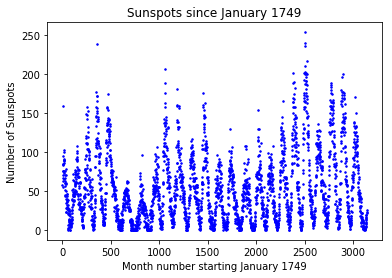

In [49]:
#load the text file
data = loadtxt("sunspots.txt",float)
time = data[:,0] #number of months since Jan 1749 
sunspots = data[:,1] #number of sunspots per month since Jan 1749 
plot(time, sunspots, "b.", markersize = 3)
ylabel("Number of Sunspots")
xlabel("Month number starting January 1749")
title("Sunspots since January 1749")

#### 3.1.b 

We plot the first 1,000 data points. 

(0, 1000)

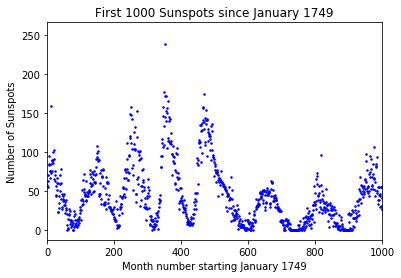

In [53]:
#Plotting only the first 1000 data points 
plot(time, sunspots, "b.", markersize = 3)
ylabel("Number of Sunspots")
xlabel("Month number starting January 1749")
title("First 1000 Sunspots since January 1749")
xlim(0, 1000)

#### 3.1.c 

We now plot the running average of the data using the following formula 


$$ Y_k = \frac{1}{2r} \sum_{m = -r}^{r} y_k+m $$

where $r = 5$ in this case and $y_k$ is the number of sunspots. We will plot the original data and the running average on the same graph.

(0, 1000)

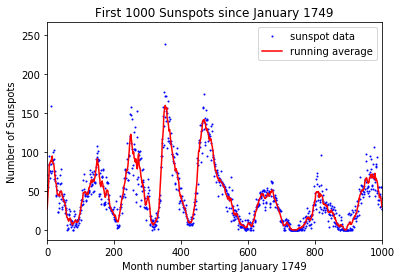

In [54]:
r = 5 #given value 
y = 0 #average initialization 
sum = 0.0 #sum initialization 
averages = [] #list to contain running average 
#calculate running averages 
for i in time: 
    i = int(i)
    sum = 0 
    for j in range(-r, r, 1):
        k = i + j
        if k <= 0:
            continue
        if k >= len(sunspots):
            continue
        sum += sunspots[k]
    y = 1 / (2*r) * sum 
    #print(sum)
    averages.append(y) 

#plot data and running average for first 1000 points 
plot(time, sunspots, "b.", markersize = 2, label = "sunspot data") 
plot(time, averages, "r", markersize = 2, label = "running average") 
legend(loc = "upper right")
ylabel("Number of Sunspots")
xlabel("Month number starting January 1749")
title("First 1000 Sunspots since January 1749")
xlim(0, 1000)

### CP 3.2 [Curve Plotting]

We demonstrate the versitility of the plot function by plotting less standard (x,y) plots. 

#### 3.2.a 

We will demonstrate plotting parametric equations using the plot function by plotting (x,y) for the following equations: 

$$ x = 2\cos(\theta) + \cos(2\theta),\qquad y = 2\sin(\theta) - \sin(2\theta)$$ 

Text(0.5,1,'Parametric plot of x vs y')

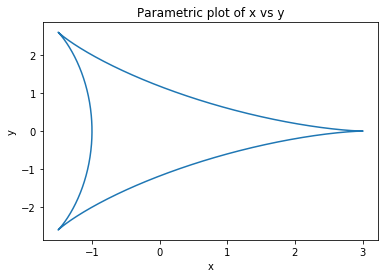

In [6]:
xvals = [] 
yvals = [] 
thetas = linspace(0, 2*pi, 1000)
for i in thetas: 
    x = 2*cos(i) + cos(2*i)
    y = 2*sin(i) - sin(2*i)
    xvals.append(x)
    yvals.append(y)
    
plot(xvals, yvals)
xlabel("x")
ylabel("y")
title("Parametric plot of x vs y")

#### 3.2.b 

We wish to create a polar graph for the equation $r = \theta^2$ from $0 <= \theta <= 10\pi$. We convert $r$ and $\theta$ to Cartesian coordinates using $x = r\cos(\theta)$ and $y = r\sin(\theta)$

Text(0.5,1,'polar graph of r and theta')

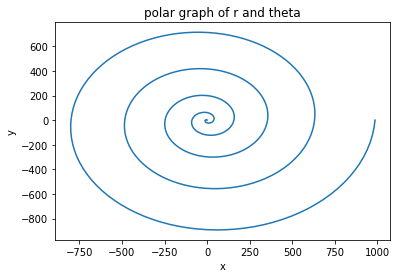

In [7]:
xvals = []
yvals = []
thetas = linspace(0, 10*pi, 500)
for i in thetas: 
    r = i**2
    x = r*cos(i)
    y = r*sin(i)
    xvals.append(x)
    yvals.append(y)
    
#print(xvals)
plot(xvals, yvals)
xlabel("x")
ylabel("y")
title("polar graph of r and theta")

#### 3.2.c 

We plot a polar plot of Fey's function using the same method as 3.2.b 

$$ r = e^{\cos(\theta)} - 2\cos(4\theta) + \sin^{5}(\frac{\theta}{12})$$

between $0 \leq \theta \leq 24\pi$

Text(0.5,1,"Fey's function")

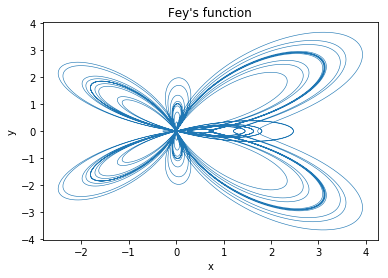

In [8]:
xvals = []
yvals = [] 
thetas = linspace(0, 24*pi, 10000)
for i in thetas: 
    r = exp(cos(i)) - 2*cos(4*i) + (sin(i/12))**5
    x = r*cos(i)
    y = r*sin(i)
    xvals.append(x)
    yvals.append(y)
    
plot(xvals, yvals, linewidth = 0.6)
xlabel("x")
ylabel("y")
title("Fey's function")

### CP 3.8 [Least Squares Fitting and the Photo-electric effect]

We wish to solve for $\chi^2$ using the method of least squares fitting 

#### 3.8.a, b

We will read in data from a file called "millikan.txt" and plot the data points. 

We will calculate the values of $E_x$, $E_y$, $E_xx$, $E_xy$, which are as follows 

$$E_x = \frac{1}{N} \sum_{i=1}^{N}x_i, \qquad E_y = \frac{1}{N} \sum_{i=1}^{N}y_i, \qquad E_{xx} = \frac{1}{N} \sum_{i=1}^{N}x_i^2, \qquad E_{xy} = \frac{1}{N} \sum_{i=1}^{N}x_iy_i$$

Then, we use these values to calculate $m$ and $c$ using the following formulas: 

$$ m = \frac{E_{xy} - E_xE_y}{E_{xx} - E^2_x} \qquad c = \frac{E_{xx}E_y - E_xE_{xy}}{E_{xx} - {E^2_x}}$$

The calculated value of m is 4.08823E-15
The calculated of c is -1.73124


Text(0.5,1,'Data from millikan.txt')

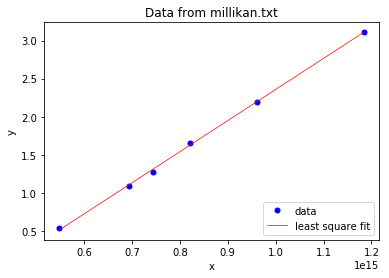

In [8]:
data = loadtxt("millikan.txt",float) #load data file 
xvals = data[:,0]
yvals = data[:,1]
N = len(xvals)  
#initialize 
xsum = 0.0
ysum = 0.0
xsquaresum = 0.0
xysum = 0.0

for i in range(0, N, 1):
    x = xvals[i]
    y = yvals[i]
    xsum += x
    ysum += y
    xsquaresum += x**2
    xysum += x*y
    
Ex = (1 / N) * xsum 
Ey = (1 / N) * ysum 
Exx = (1 / N) * xsquaresum
Exy = (1 / N) * xysum 

m = (Exy - (Ex * Ey)) / (Exx - (Ex**2))
c = (Exx * Ey - (Ex * Exy)) / (Exx - (Ex**2))

print("The calculated value of m is {:.5E}" .format(m))
print("The calculated of c is {:.5f}" .format(c))

leastsqyvals = []

#we'll now calculate the least squared fit line using m and c 
for i in range(0, len(xvals), 1): 
    leastsqy = m*xvals[i] + c
    leastsqyvals.append(leastsqy)

#print(leastsqyvals)


plot(xvals, yvals, "b.", markersize = 10, label = "data") #plot of data 
plot(xvals, leastsqyvals, "r", linewidth = 0.7, label = "least square fit") 
#plot of least square fit 
legend(loc = "lower right")
xlabel("x")
ylabel("y")
title("Data from millikan.txt")

#### 3.8.d 

We will now calculate Planck's constant using the data we were given in the millikan.txt file. The first column is frequency and the second column is in volts. 

We solve for h using the formula $$ V = \frac{h}{e}\nu - \phi $$ 

where $V$ is voltage, $e$ is the charge of an electron, $\nu$ is the frequency in Hz, $\phi$ is the work function and $h$ is plank's constant.

We will rename our previous variables such that $c = -\phi$, $y = V$ and $x = \nu$

In [12]:
#calculating difference between estimated and real Planck's constant. 
e = 1.602e-19 #charge of an electron in coulombs 
estimatedPlanck = m * e
realPlanck = h
print("The estimated Planck's constant is", estimatedPlanck)
print("The actual value of Planck's constant is", realPlanck)
dh = sqrt((realPlanck - estimatedPlanck)**2)
error = dh / realPlanck
print("The error in Planck's constant is {:3.3f}%" 
      .format(error * 100))

The estimated Planck's constant is 6.54934022835e-34
The actual value of Planck's constant is 6.62607004e-34
The error in Planck's constant is 1.158%


### CP 4.4 [Accuracy of integration]

We will compute the the following integral using a numerical approach: 

$$I = \int_{-1}^{1}\sqrt{1-x^2}dx$$

In order to compute this numerically, we use the Riemann definition of the integral: 

$$ I = \lim_{N\to\infty}\sum_{k=1}^{N}hy_k$$

where 

$$y_k = \sqrt{1 - x^2_k}  \qquad and \qquad x_k = -1 + hk$$

4.4.a

We start by using Riemann sums with N = 100 rectangles 

In [15]:
N = 100 
h = 2 / N 
sum = 0 


for i in range(0, N, 1):
    x = -1 + (h*(i+1))
    y = sqrt(1 - x**2)
    sum += h * y 
    
trueintegral = 1.57079632679 #from textbook 
error = sqrt((sum - trueintegral)**2) / trueintegral 
print("The true value of the integral is {:.5f}" 
      .format(trueintegral))
print("The integral using Riemann sums is {:.5f}" .format(sum))
print("The error between the two values is {:3.2f}%" 
      .format(error * 100))

The true value of the integral is 1.57080
The integral using Riemann sums is 1.56913
The error between the two values is 0.11%


### 4.4.b 

We will increase the number of slices N until so that it takes my computer about 1 second to run the computation. We will determine how accurate this value of N will be. 

In [28]:
N = 4000000
h = 2 / N 
sum = 0 


for i in range(0, N, 1):
    x = -1 + (h*(i+1))
    y = sqrt(1 - x**2)
    sum += h * y 
    
trueintegral = 1.57079632679 #from textbook 
error = sqrt((sum - trueintegral)**2) / trueintegral 
print("The true value of the integral is {:.11f}" .format(trueintegral))
print("The integral using Riemann sums is {:.11f}" .format(sum))
print("For 1 second runtime, the error is {:3.9f}%" .format(error * 100))

The true value of the integral is 1.57079632679
The integral using Riemann sums is 1.57079632659
For 1 second runtime, the error is 0.000000013%


### CP 5.1 [Integration of Velocities with the trapezoidal rule]

We read in a file of times and velocities. Then, using the trapezoidal rule, we will calcluate the distance traveled by the particle in the x direction as a function of time. 

The area of a trapezoid is as follows: 

$$A_k = \frac{1}{2}h[f(a+(k-1)h) + f(a_kh)]$$

The extended trapezoidal rule is then: 

$$I(a,b) \approx \sum_{k=1}^{N}A_k = h[\frac{1}{2}f(a) + \frac{1}{2}f(b) + \sum_{k=1}^{N-1}f(a+kh)]$$



#### 5.1.a 

Since we are given data points and not a function, we are limited to using N number of slices equal to the number of data points we have. Furthermore, the width of our trapezoid or $h$ will be the distance from an $ith$ data point to the $ith + 1$ data point, and our function values $f(a+(k-1)h)$ and $f(a_kh)$ will be the values of our data points.  

The distance traveled by the particle is 8.3019


Text(0.5,1,'Distance and velocity vs. time')

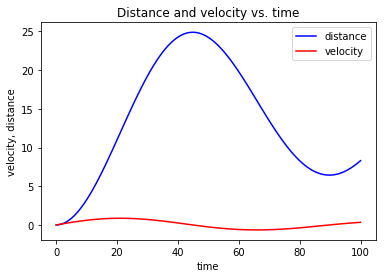

In [42]:
data = loadtxt("velocities.txt", float) #load the data 
time = data[:,0]
velocities = data[:,1]
N = len(velocities) - 1 #this has 101 elements 
a = time[0] #initial time
b = time[-1] #final time 
h = (b - a) / (N - 1) #width of the trapezoid 

#initialize the list of distance values 
distvals = [0]
#initialize sum of total distance traveled so far
distsofar = 0 


#this is 1/2f(a) * 1/2f(b)
sum = 0.5*velocities[0] + 0.5*velocities[-1] 
for i in range(1, N, 1): 
    '''
    we will loop through indices 1 - 99 because the endpoints, 
    velocities[0] and velocities [100], are already included in 
    the initialization of the sum.
    '''
    sum += velocities[i] #calculate the sum of the velocities 
    areaundercurve = 0.5 * (velocities[i-1] + velocities[i]) * h 
    distsofar += areaundercurve #sum distance traveled 

    distvals.append(distsofar)

#add the area of the last trapezoid which is not included 
#in the for loop 
lasttrap = 0.5 * (velocities[99] + velocities[100]) * h 
distsofar += lasttrap
distvals.append(distsofar)
    
disttraveled = sum * h
print("The distance traveled by the particle is {:.4f}".format(disttraveled))
plot(time, distvals, "b", label="distance")
plot(time, velocities, "r", label="velocity")
legend(loc="upper right")
xlabel("time")
ylabel("velocity, distance")
title("Distance and velocity vs. time")

### CP 5.2 [Integration with Simpson's Rule]

5.2.a 

We use Simpson's rule to calculate an approximate value for the integral $\int_{0}^{2}(x^4 - 2x+1)dx$ from Example 5.1 with N = 10 slices

We can approximate the area under each slice of the curve (say from -h to h) by finding the area under the quadratic (our three points would be -h, 0, and h).

$$A_x = \frac{1}{3}h[f(-h) + 4f(0) + f(h)]$$

In general, there will be three points: a, a+h, a+2h, where h is the slice length. That means that the area we compute under the curve is two slices long. 


To compute the approximate value of the integral, we use the following equation: 

$$I(a,b) \approx \frac{1}{3}h[f(a) + f(b) + 4\sum_{k odd, 1...N-1}^{N-1}f(a+kh) + 2\sum_{k even, 2...N-2}^{N-2}f(a+kh)]$$

In [35]:
def f(x): 
    '''This is the given equation
    that we want to integrate '''
    return x**4 - 2*x + 1

def simpRule(slices):
    '''This calculates the value of an integral 
    using Simpson's rule and its parameters are
    the number of quadratics used to approximate
    the integral. 
    '''
    N = slices #number of slices 
    a = 0.0 #starting x value 
    b = 2.0 #ending x value 
    h = (b-a) / N
    s = f(a) + f(b) #this is initial part of the sum

    #we now compute the sums in the above equation 
        
    #for the odd terms 
    for i in range(1, N, 2): 
        s += 4* f(a+i*h)
    
    #for the even terms 
    for i in range(2, N, 2):
        s += 2* f(a+i*h)
    
    return((1/3)*h*s)

simp10 = simpRule(10)
simp100 = simpRule(100)
simp1000 = simpRule(1000)
trueintvalue = 4.4
print("The true value is ", trueintvalue)
print("Simpson's rule with N = 10 slices is {:.5f}" .format(simp10))
error = sqrt((trueintvalue - simp10)**2) / trueintvalue
print("For N=10, the fractional error is {:3.3f}%" .format(error * 100))


The true value is  4.4
Simpson's rule with N = 10 slices is 4.40043
For N=10, the fractional error is 0.010%


In [48]:
#Trap rule for same function 

def f(x):
    '''
    This is the function given 
    that we want to integrate 
    '''
    return x**4 - 2*x + 1

def traprule(slices):
    '''
    This returns the approx. integral of a function
    using the trapezoidal rule. It takes in the number
    of trapezoids used to approximate the value of the 
    integral. 
    '''
    N = slices
    a = 0.0
    b = 2.0
    h = (b-a) / N 

    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    
    return h*s

trap10 = traprule(10)
trap100 = traprule(100)
trap1000 = traprule(1000)

print("The true value of the integral is {:.1f}" .format(trueintvalue))
print("Simp rule with 10 slices is {:.5f}" .format(simp10))
print("Trap rule with 10 slices is {:.5f}" .format(trap10))
print("Simp rule with 100 slices is {:.8f}" .format(simp100))
print("Trap rule with 100 slices is {:.8f}" .format(trap100))
print("Simp rule with 1000 slices is {:.12f}" .format(simp1000))
print("Trap rule with 1000 slices is {:.12f}" .format(trap1000))

The true value of the integral is 4.4
Simp rule with 10 slices is 4.40043
Trap rule with 10 slices is 4.50656
Simp rule with 100 slices is 4.40000004
Trap rule with 100 slices is 4.40106666
Simp rule with 1000 slices is 4.400000000004
Trap rule with 1000 slices is 4.400010666666
